In [1]:
>>> from sklearn.datasets import fetch_openml

In [2]:
>>> mnist = fetch_openml('mnist_784', version=1)
>>> mnist.keys()

C:\Users\Raushan Kumar\AppData\Roaming\Python\Python37\site-packages\sklearn\datasets\_openml.py:57: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [3]:
import joblib

In [ ]:
joblib.dump(my_model, "my_model.pkl")
# and later...
my_model_loaded = joblib.load("my_model.pkl")

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
>>> grid_search.best_params_

In [4]:
from sklearn.decomposition import PCA

In [3]:
>>> import tensorflow as tf
>>> from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
>>> class_names[y_train[0]]

'Coat'

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
#other way to write above code
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [11]:
>>> model.layers

In [12]:
>>> hidden1 = model.layers[1]
>>> hidden1.name

'dense_3'

In [13]:
>>> model.get_layer('dense') is hidden1

ValueError: No such layer: dense

In [16]:
>>> weights, biases = hidden1.get_weights()
>>> weights

array([[-0.03177692, -0.03131831, -0.07356303, ..., -0.0046429 ,
         0.01871201,  0.02811063],
       [-0.07231633,  0.07308285, -0.03772911, ...,  0.06776179,
        -0.00590747, -0.01785867],
       [ 0.04822344, -0.06534629,  0.0189693 , ...,  0.00581131,
         0.00691709,  0.01297542],
       ...,
       [-0.06975805,  0.03465687,  0.01960925, ...,  0.05528353,
        -0.00923672, -0.0253643 ],
       [-0.01915839,  0.05289373, -0.01252566, ..., -0.07295422,
        -0.07090846, -0.00129275],
       [ 0.0007422 , -0.01726212, -0.01179965, ..., -0.01545267,
         0.01081549, -0.0450853 ]], dtype=float32)

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [115]:
>>> history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6963 - accuracy: 0.7711 - val_loss: 0.5414 - val_accuracy: 0.8026
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4841 - accuracy: 0.8298 - val_loss: 0.4417 - val_accuracy: 0.8476
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4409 - accuracy: 0.8463 - val_loss: 0.4224 - val_accuracy: 0.8578
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4140 - accuracy: 0.8548 - val_loss: 0.3916 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3958 - accuracy: 0.8611 - val_loss: 0.3784 - val_accuracy: 0.8710
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3802 - accuracy: 0.8658 - val_loss: 0.3610 - val_accuracy: 0.8772
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3660 - accuracy: 0.8709 - val_loss: 0.3673 - val_accuracy:

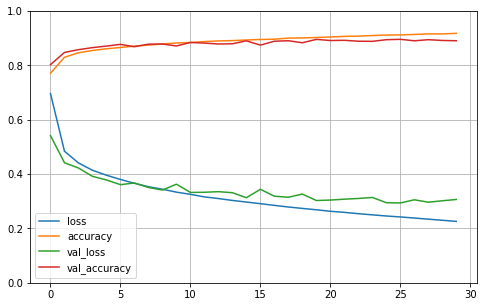

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [117]:
import numpy as np

In [17]:
>>> X_new = X_test[:3]
>>> y_proba = model.predict(X_new)
>>> y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [119]:
>>> y_pred = model.predict_classes(X_new)
>>> y_pred
>>> np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [120]:
>>> y_new = y_test[:3]
>>> y_new

array([9, 2, 1], dtype=uint8)

In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
housing = fetch_california_housing()

In [20]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [42]:
model = keras.models.Sequential([
keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
keras.layers.Dense(1)
])

In [43]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3104 - val_loss: 0.5569
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5311 - val_loss: 0.4883
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4883 - val_loss: 0.4510
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4643 - val_loss: 0.4359
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4473 - val_loss: 0.4166
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4548 - val_loss: 0.4199
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4331 - val_loss: 0.4052
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4246 - val_loss: 0.4012
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4173 - val_loss: 0.4004
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4123 - val_loss: 0.3941

In [44]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3832


In [45]:
X_new = X_test[:3]

In [46]:
y_pred = model.predict(X_new)

In [47]:
X_train.shape

(11610, 8)

In [28]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [29]:
X_train.shape[1:]

(8,)

In [30]:
(5,)

(5,)

In [31]:
input_A = keras.layers.Input(shape=(5), name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [32]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [77]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [48]:
X_train_B

array([[ 1.38548275, -0.19954303, -0.35764591,  0.00312437, -0.84195217,
         0.87248502],
       [ 0.74670773, -0.12995939,  0.13081197,  0.02649373, -0.63200372,
         0.40408859],
       [-0.05006966, -0.07694858,  1.31808549, -0.08946557,  1.28085998,
        -1.18546949],
       ...,
       [ 0.19806895, -0.09036343,  0.03900328,  0.05207836, -0.72064862,
         1.18641028],
       [-0.42009035,  0.09920672, -0.02695636, -0.0114253 , -0.78596592,
         0.62832093],
       [-0.37312565,  0.12739066, -0.2711853 , -0.03805503,  0.5157145 ,
        -0.07925665]])

In [35]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.5637 - val_loss: 0.7911
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7674 - val_loss: 0.6281
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6250 - val_loss: 0.5783
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5970 - val_loss: 0.5588
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5812 - val_loss: 0.5453
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5689 - val_loss: 0.5345
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5583 - val_loss: 0.5248
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5493 - val_loss: 0.5163
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5408 - val_loss: 0.5095
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5337 - val_loss: 0.5024

In [136]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

162/162 [==============================] - 0s 1ms/step - loss: 0.5085


In [50]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [53]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [54]:
history = model.fit(
[X_train_A, X_train_B], [y_train, y_train], epochs=20,
validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6585 - main_output_loss: 0.6177 - aux_output_loss: 1.0259 - val_loss: 0.4233 - val_main_output_loss: 0.3958 - val_aux_output_loss: 0.6714
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4289 - main_output_loss: 0.4046 - aux_output_loss: 0.6473 - val_loss: 0.3946 - val_main_output_loss: 0.3720 - val_aux_output_loss: 0.5986
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4057 - main_output_loss: 0.3855 - aux_output_loss: 0.5873 - val_loss: 0.3802 - val_main_output_loss: 0.3613 - val_aux_output_loss: 0.5511
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3964 - main_output_loss: 0.3790 - aux_output_loss: 0.5535 - val_loss: 0.3686 - val_main_output_loss: 0.3519 - val_aux_output_loss: 0.5190
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3861 - main_output_loss: 0.3700 - aux_output_loss: 0.5310 - val_loss

In [55]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.3812 - main_output_loss: 0.3719 - aux_output_loss: 0.4647


In [56]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [ ]:
#model = keras.models.load_model("my_keras_model.h5")

In [59]:
pwd()

'C:\\Users\\Raushan Kumar\\Downloads\\Code'

In [60]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("C:\\Users\\Raushan Kumar\\Downloads\\Code\\my_keras_model.h5")
#history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

In [64]:
[checkpoint_cb]

In [66]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("C:\\Users\\Raushan Kumar\\Downloads\\Code\\my_keras_model.h5",save_best_only=True)

In [80]:
X_train.shape

(11610, 8)

In [81]:
y_train.shape

(11610,)

In [83]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train],
validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]), epochs=10,callbacks=checkpoint_cb)


Epoch 1/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3483 - main_output_loss: 0.3387 - aux_output_loss: 0.4348 - val_loss: 0.3321 - val_main_output_loss: 0.3222 - val_aux_output_loss: 0.4214
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3549 - main_output_loss: 0.3466 - aux_output_loss: 0.4300 - val_loss: 0.3301 - val_main_output_loss: 0.3216 - val_aux_output_loss: 0.4058
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3442 - main_output_loss: 0.3349 - aux_output_loss: 0.4273 - val_loss: 0.3291 - val_main_output_loss: 0.3202 - val_aux_output_loss: 0.4085
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3423 - main_output_loss: 0.3331 - aux_output_loss: 0.4249 - val_loss: 0.3895 - val_main_output_loss: 0.3874 - val_aux_output_loss: 0.4085
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3481 - main_output_loss: 0.3392 - aux_output_loss: 0.4282 - val_loss

In [84]:
model = keras.models.load_model("my_keras_model.h5")

In [85]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
validation_data=(X_valid, y_valid),
callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
"n_hidden": [0, 1, 2, 3],
"n_neurons": np.arange(1, 100),
"learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
validation_data=(X_valid, y_valid),
callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
>>> rnd_search_cv.best_params_
{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}
>>> rnd_search_cv.best_score_
-0.3189529188278931
>>> model = rnd_search_cv.best_estimator_.model

In [87]:
model_A = keras.models.load_model("my_keras_model.h5")

In [92]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False
model_B_on_A.compile(loss="binary_crossentropy", optimizer="sgd",metrics=["accuracy"])

In [ ]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,validation_data=(X_valid_B, y_valid_B))
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

In [ ]:
optimizer = keras.optimizers.SGD(lr=1e-4) # the default lr is 1e-2
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer,
metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
validation_data=(X_valid_B, y_valid_B))

In [ ]:
>>> model_B_on_A.evaluate(X_test_B, y_test_B)

In [89]:
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])

ValueError: A merge layer should be called on a list of inputs.

In [90]:
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

NameError: name 'model_B_on_A' is not defined

In [ ]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

In [93]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])

In [96]:
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [95]:
tf.transpose(t)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 4.],
       [2., 5.],
       [3., 6.]], dtype=float32)>

In [97]:
>>> t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [98]:
>>> from tensorflow import keras

In [99]:
>>> K = keras.backend
>>> K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

In [102]:
import numpy as np

In [104]:
>>> a = np.array([2., 4., 5.])
tf.constant(a)
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [105]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [106]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

In [ ]:
tokenizer.fit_on_texts("Raushan is a good boy")